# Overview

* the goal of this notebook is to download and display WISE images for APPSS galaxies
* we will use the WISE images to estimate the stellar mass of galaxiesy
* there are two samples of galaxies: APPSS sample, and the supernova host galaxy sample



In [1]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
homedir = os.getenv("HOME")
sys.path.append(homedir+"/github/APPSS/python/")

In [3]:
from image_functions import *

In [4]:
UNWISE_PIXSCALE = 2.75
LEGACY_PIXSCALE = 1


# Set the working directory to something other than github directory

In [5]:
cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)

# Read in catalog of galaxies

In [6]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/sample/appss123.catalog.211115.csv"
apps = Table.read(appscat_filename)

In [7]:
apps

hiname,agcnum,othername,HIra,HIdec,OCra,OCdec,hv50,hverr,iw50,iwerr,iv20,flux,fluxerr,sn,rms,icodelbw,appss,specfile,icodea100
str16,int64,str7,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str3,str26,int64
H215143.8+251518,11834,472-014,327.93249512,25.25499916,327.93249512,25.25499916,3261,2,192,3,211,2.52,0.06,37.3,1.09,8,ap3,H215143.8+251518,1
H224250.1+325936,12165,--,340.70874023,32.99333191,340.70874023,32.99333191,6522,5,351,7,361,1.97,0.11,16.1,1.45,8,ap3,H224250.1+325936,1
S220002.9+304808,322491,--,330.01208496,30.8022213,330.01208496,30.8022213,12545,4,204,6,218,0.58,0.06,9.6,0.74,8,ap2,S220002.9+304808,0
S220415.3+293244,322494,--,331.06375122,29.54555511,331.06375122,29.54555511,4870,2,126,3,131,0.27,0.04,6.3,0.76,8,ap2,S220415.3+293244,0
S220440.1+245549,323399,--,331.16708374,24.93027687,331.16708374,24.93027687,6145,6,132,8,148,0.45,0.05,8.2,0.91,8,ap2,S220440.1+245549,0
S220801.7+291527,323400,--,332.00708008,29.25749969,332.00708008,29.25749969,2894,4,31,6,38,0.1,0.01,6.9,0.6,8,ap3,S220801.7+291527_2peak,0
S220816.5+304000,322496,--,332.0687561,30.66666603,332.0687561,30.66666603,1115,1,45,1,59,0.5,0.02,21.7,0.6,8,ap2,S220816.5+304000,0
S220842.2+245624,321315,--,332.17584229,24.93999863,332.17584229,24.93999863,6356,2,151,3,160,0.44,0.04,10.9,0.6,8,ap2,S220842.2+245624,4
S220059.5+273651,321196,--,330.24789429,27.61416626,330.24789429,27.61416626,3504,5,110,7,121,0.6,0.04,12.9,0.99,8,ap3,S220059.5+273651_2019,1


In [8]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/GBT22A-sample/gbt22a_430_sample_legacy.fits"
gbt = Table.read(appscat_filename)

In [9]:
gbt

name,RA,DEC
int64,float64,float64
3611,104.299164,20.437222
3634,105.402916,14.134722
4455,127.886665,-1.198056
4510,130.210007,73.486382
5066,142.782913,46.384167
5645,156.797485,71.417496
6015,163.509995,46.0275
10244,242.48082,43.128887
10483,248.62001,76.029167


In [10]:
# select first galaxy in the list as a test
ra = gbt['RA'][4]
dec = gbt['DEC'][4]
galname = f"AGC{gbt['name'][4]:06d}"
print(galname)

AGC005066


# Select a test galaxy

In [11]:
# select first galaxy in the list as a test
ra = apps['OCra'][4]
dec = apps['OCdec'][4]
galname = 'AGC'+str(apps['agcnum'][4])


In [12]:
!ls
# run this to start over
! rm AGC11834*
!ls

AGC005066-legacy-120-g.fits
AGC005066-legacy-120.jpg
AGC005066-legacy-120-r.fits
AGC005066-legacy-120-r-phot.dat
AGC005066-legacy-120-r-phot.fits
AGC005066-legacy-120-z.fits
AGC005066-unwise-1418p469-w1-img-m.fits
AGC005066-unwise-1418p469-w1-img-m.std.fits
AGC005066-unwise-1418p469-w1-invvar-m.fits
AGC005066-unwise-1418p469-w1-n-m.fits
AGC005066-unwise-1418p469-w2-img-m.fits
AGC005066-unwise-1418p469-w2-img-m.std.fits
AGC005066-unwise-1418p469-w2-invvar-m.fits
AGC005066-unwise-1418p469-w2-n-m.fits
AGC005066-unwise-1418p469-w3-img-m.fits
AGC005066-unwise-1418p469-w3-img-m.std.fits
AGC005066-unwise-1418p469-w3-invvar-m.fits
AGC005066-unwise-1418p469-w3-n-m.fits
AGC005066-unwise-1418p469-w4-img-m.fits
AGC005066-unwise-1418p469-w4-img-m.std.fits
AGC005066-unwise-1418p469-w4-invvar-m.fits
AGC005066-unwise-1418p469-w4-n-m.fits
AGC11834-legacy-120-g.fits
AGC11834-legacy-120.jpg
AGC11834-legacy-120-r.fits
AGC11834-legacy-120-z.fits
AGC11834-unwise-3283p257-w1-img-m.fits
AGC11834-unwise-3283p2

# Display legacy and unwise with new function

In [13]:
%run ~/github/APPSS/python/image_functions.py

In [14]:
display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)
plt.show()

unwise images already downloaded
['AGC323399-unwise-3319p242-w1-img-m.fits', 'AGC323399-unwise-3319p242-w2-img-m.fits', 'AGC323399-unwise-3319p242-w4-img-m.fits', 'AGC323399-unwise-3319p242-w3-img-m.fits']
retrieving  AGC323399-legacy-120.jpg
retrieving  AGC323399-legacy-120-g.fits
http://legacysurvey.org/viewer/cutout.fits?ra=331.16708374&dec=24.93027687&layer=dr8&size=120&pixscale=1&bands=g
return from get_legacy_images =  ('AGC323399-legacy-120-g.fits', 'AGC323399-legacy-120.jpg') g AGC323399
previously downloaded  AGC323399-legacy-120.jpg
retrieving  AGC323399-legacy-120-r.fits
http://legacysurvey.org/viewer/cutout.fits?ra=331.16708374&dec=24.93027687&layer=dr8&size=120&pixscale=1&bands=r
return from get_legacy_images =  ('AGC323399-legacy-120-r.fits', 'AGC323399-legacy-120.jpg') r AGC323399
previously downloaded  AGC323399-legacy-120.jpg
retrieving  AGC323399-legacy-120-z.fits
http://legacysurvey.org/viewer/cutout.fits?ra=331.16708374&dec=24.93027687&layer=dr8&size=120&pixscale=1&

# Display first 20 galaxies

In [15]:
%run ~/github/APPSS/python/image_functions.py

In [17]:
plotdir = cwd+"/plots/"
i = 0
#while i < 10:
for i in range(20):
    
    ra = apps['OCra'][i]
    dec = apps['OCdec'][i]
    galname = 'AGC'+str(apps['agcnum'][i])
    try:
        display_legacy_unwise(ra,dec,galname,imsize_arcsec=60,plotdir=plotdir)
    except:
        print("Trouble in paradise...")
    

unwise images already downloaded
['AGC11834-unwise-3283p257-w3-img-m.fits', 'AGC11834-unwise-3283p257-w4-img-m.fits', 'AGC11834-unwise-3283p257-w2-img-m.fits', 'AGC11834-unwise-3283p257-w1-img-m.fits']
previously downloaded  AGC11834-legacy-60.jpg
previously downloaded  AGC11834-legacy-60-g.fits
return from get_legacy_images =  ('AGC11834-legacy-60-g.fits', 'AGC11834-legacy-60.jpg') g AGC11834
previously downloaded  AGC11834-legacy-60.jpg
previously downloaded  AGC11834-legacy-60-r.fits
return from get_legacy_images =  ('AGC11834-legacy-60-r.fits', 'AGC11834-legacy-60.jpg') r AGC11834
previously downloaded  AGC11834-legacy-60.jpg
previously downloaded  AGC11834-legacy-60-z.fits
return from get_legacy_images =  ('AGC11834-legacy-60-z.fits', 'AGC11834-legacy-60.jpg') z AGC11834
unwise images already downloaded
['AGC12165-unwise-3401p333-w1-img-m.fits', 'AGC12165-unwise-3401p333-w4-img-m.fits', 'AGC12165-unwise-3401p333-w2-img-m.fits', 'AGC12165-unwise-3401p333-w3-img-m.fits']
previously 

# Code to download a WISE image

In [18]:
# set image size
imsize_arcsec = 120 # length/width of image in arcseconds
imsize_pixels_legacy = round(imsize_arcsec/LEGACY_PIXSCALE)
imsize_pixels_unwise = round(imsize_arcsec/UNWISE_PIXSCALE)

In [19]:

t = get_unwise_image(ra,dec,galid=galname,makeplots=False,imsize=str(imsize_pixels_unwise))
imagefiles = t[0]
noisefiles = t[1]
imagefiles.sort()
noisefiles.sort()

unwise images already downloaded
['AGC321210-unwise-3360p287-w4-img-m.fits', 'AGC321210-unwise-3360p287-w1-img-m.fits', 'AGC321210-unwise-3346p272-w3-img-m.fits', 'AGC321210-unwise-3360p287-w3-img-m.fits', 'AGC321210-unwise-3346p272-w1-img-m.fits', 'AGC321210-unwise-3346p272-w2-img-m.fits', 'AGC321210-unwise-3346p272-w4-img-m.fits', 'AGC321210-unwise-3360p287-w2-img-m.fits']
going to try new stacking for wise multiframe
running swarp to combine multiple unwise images in band  1
swarp AGC321210-unwise-3360p287-w1-img-m.fits AGC321210-unwise-3346p272-w1-img-m.fits -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N
running swarp to combine multiple unwise images in band  2
swarp AGC321210-unwise-3346p272-w2-img-m.fits AGC321210-unwise-3360p287-w2-img-m.fits -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N
running swarp to combine multiple unwise images in band  3
swarp AGC321210-unwise-3346p272-w3-img-m.fits AGC321210-unwise-3360p287-w3-img-m.fits -COMBINE_TYPE

# Code to download legacy images

In [20]:
bands = ['g','r','z']
legimfiles = []

for i,b in enumerate(bands):
    if i == 0:
        # only need to download this once
        getjpg = True
    else:
        getjpg = False
    t = get_legacy_images(ra,dec,galid=galname,band=b,makeplots=False,imsize=str(imsize_pixels_legacy))
    if i == 0:
        legimfiles.append(t[0])
        legjpgfile = t[1]
    else:
        legimfiles.append(t[0])
print(legimfiles)
print(legjpgfile)

retrieving  AGC321210-legacy-120.jpg
retrieving  AGC321210-legacy-120-g.fits
http://legacysurvey.org/viewer/cutout.fits?ra=335.44042969&dec=28.03083229&layer=dr8&size=120&pixscale=1&bands=g
previously downloaded  AGC321210-legacy-120.jpg
retrieving  AGC321210-legacy-120-r.fits
http://legacysurvey.org/viewer/cutout.fits?ra=335.44042969&dec=28.03083229&layer=dr8&size=120&pixscale=1&bands=r
previously downloaded  AGC321210-legacy-120.jpg
retrieving  AGC321210-legacy-120-z.fits
http://legacysurvey.org/viewer/cutout.fits?ra=335.44042969&dec=28.03083229&layer=dr8&size=120&pixscale=1&bands=z
['AGC321210-legacy-120-g.fits', 'AGC321210-legacy-120-r.fits', 'AGC321210-legacy-120-z.fits']
AGC321210-legacy-120.jpg


# Plot cutouts

In [ ]:
# make a plot
plt.figure(figsize=(12,6.5))

# concatinate lists
legacy_images = [legjpgfile]+legimfiles
imnames = ['grz','g','r','z']
# plot legacy images in top row
for i,im in enumerate(legacy_images):
    plt.subplot(2,4,i+1)
    if i == 0:
        # display jpg
        t = Image.open(im)
        plt.imshow(t,origin='upper')
    else:
        data = fits.getdata(im)
        display_image(data,lowrange=False,percent=95)
    plt.title(imnames[i],fontsize=14)

# plot WISE images
imnames = ['W1','W2','W3','W4']
for i,im in enumerate(imagefiles):
    plt.subplot(2,4,4+i+1)
    data = fits.getdata(im)
    display_image(data,percent=92)
    plt.title(imnames[i],fontsize=14)

# Read in GBT Table

* Read in GBT catalog
* Select a galaxy
* get the Legacy and unWISE images

In [21]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/GBT22A-sample/gbt22a_430_sample_legacy.fits"
gbt = Table.read(appscat_filename)

# select first galaxy in the list as a test
ra = gbt['RA'][4]
dec = gbt['DEC'][4]
galname = f"AGC{gbt['name'][4]:06d}"
print(galname)

AGC005066


In [22]:
%run ~/github/APPSS/python/image_functions.py
%matplotlib inline
display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)
plt.show()

unwise images already downloaded
['AGC005066-unwise-1418p469-w1-img-m.fits', 'AGC005066-unwise-1418p469-w3-img-m.fits', 'AGC005066-unwise-1418p469-w2-img-m.fits', 'AGC005066-unwise-1418p469-w4-img-m.fits']
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-g.fits
return from get_legacy_images =  ('AGC005066-legacy-120-g.fits', 'AGC005066-legacy-120.jpg') g AGC005066
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-r.fits
return from get_legacy_images =  ('AGC005066-legacy-120-r.fits', 'AGC005066-legacy-120.jpg') r AGC005066
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-z.fits
return from get_legacy_images =  ('AGC005066-legacy-120-z.fits', 'AGC005066-legacy-120.jpg') z AGC005066


In [23]:
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


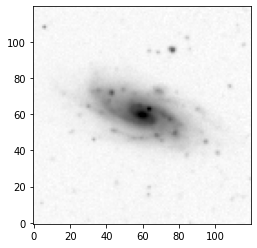

In [24]:
plt.figure()
display_image(data)

# Trying my photwrapper program from halphagui

In [26]:
import sys
import os
%matplotlib inline
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/halphagui/')

In [27]:
%load_ext autoreload
%autoreload 2

In [28]:
import photwrapper

In [29]:
cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


In [30]:
e = photwrapper.ellipse(imname)

not using a mask


In [31]:
e.detect_objects()

<Figure size 432x288 with 0 Axes>

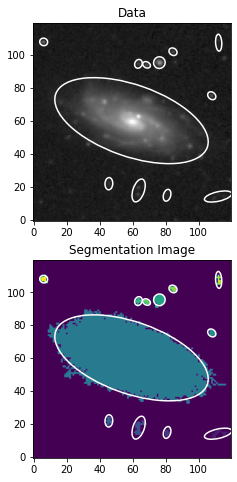

In [32]:
#just to check that object detection was ok
e.show_seg_aperture()

In [33]:
test = e.cat.to_table()

In [38]:
e.find_central_object()

In [39]:
e.get_ellipse_guess()

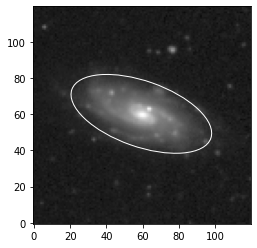

In [40]:
%matplotlib inline
e.draw_guess_ellipse_mpl()

In [41]:
e.measure_phot()

number of apertures =  14


<Figure size 432x288 with 0 Axes>

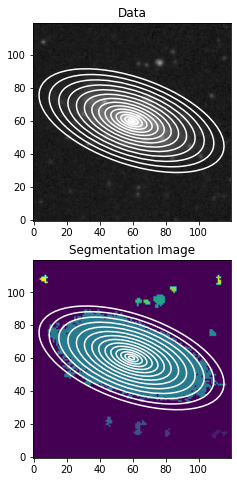

In [42]:
%matplotlib inline
e.draw_phot_apertures()

In [43]:
e.calc_sb()
e.convert_units()
e.write_phot_tables()
e.write_phot_fits_tables()

mag zp =  25.0
photometry outfile =  AGC005066-legacy-120-r-phot.fits


# Read results from elliptical aperture fitting

In [ ]:
ptab = Table.read('AGC005066-legacy-120-r-phot.fits')

In [ ]:
ptab

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(ptab['sma_arcsec'],ptab['flux'])
plt.xlabel("Semi-major axis (arcsec)",fontsize=16)
plt.ylabel("Flux",fontsize=16)